# Stock Price Prediction Using LSTM (Long Short-Term Memory)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')


import yfinance as yf


In [14]:

symbol = 'TCS.NS'
start = '2017-11-01'
end = '2022-10-20'


df = yf.download(symbol,start,end)


df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2017-11-01,1134.186279,1301.425049,1313.425049,1289.425049,1312.000000,741882
2017-11-02,1144.339355,1313.074951,1337.000000,1303.375000,1304.250000,1468422
2017-11-03,1141.703247,1310.050049,1318.349976,1301.400024,1316.199951,666886
2017-11-06,1161.507812,1332.775024,1335.900024,1305.875000,1310.000000,1377000
2017-11-07,1180.898804,1355.025024,1384.000000,1333.025024,1335.000000,2696892
...,...,...,...,...,...,...
2022-10-13,2953.317383,3103.300049,3110.000000,3052.350098,3100.750000,2054781
2022-10-14,2949.368164,3099.149902,3150.000000,3071.000000,3145.000000,2245977


Text(0, 0.5, 'Price')

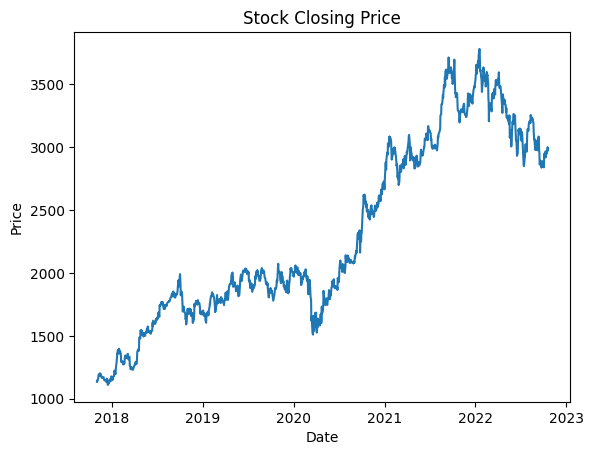

In [15]:
plt.plot(df['Adj Close'])
plt.title('Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')

In [16]:
df = df.reset_index()

In [17]:
df = df['Adj Close'].values
df = df.reshape(-1, 1)

In [18]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [20]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [21]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [22]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [23]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0438
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0047
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 0.0036
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - loss: 0.0032
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 0.0031
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - loss: 0.0045
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0033
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 0.0025
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - loss: 0.0026
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0023
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - loss: 0.0030
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 0.0022
Epoch 13/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0025
Epoch 14/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 143ms/step - loss: 0.0020
Epoch 15/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - l

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


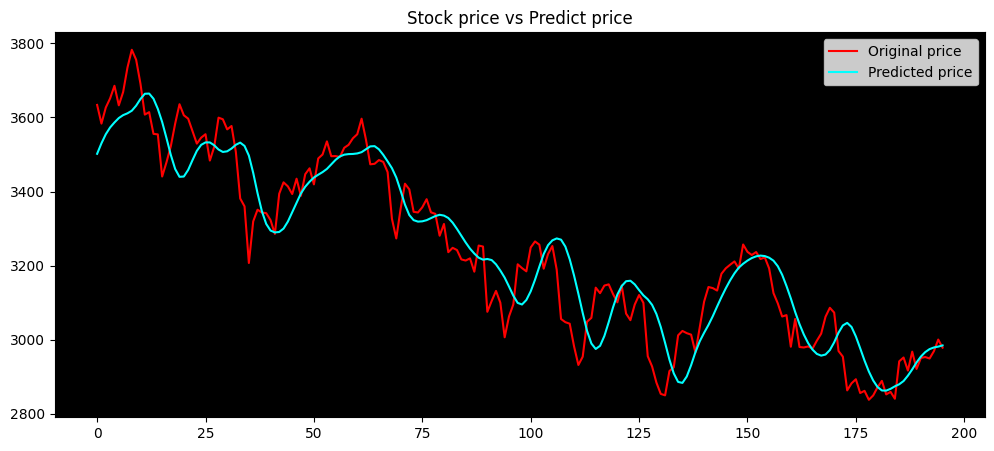

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(12,5))
ax.set_facecolor('black')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.title('Stock price vs Predict price')
plt.legend()

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 96)              │          37,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 96)              │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50, 96)              │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 96)                  │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,197 (2.98 MB)

 Trainable params: 260,065 (1015.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 520,132 (1.98 MB)